In [1]:
import xarray as xr
%matplotlib inline
ds = xr.open_dataset(r'data\CCSM4-rcp45-tasmax.nc4')

c:\users\anatrisovic\desktop\xarray-tutorial\env\lib\site-packages\xarray\core\merge.py:17: FutureWarning: The Panel class is removed from pandas. Accessing it from the top-level namespace will also be removed in the next version
  PANDAS_TYPES = (pd.Series, pd.DataFrame, pd.Panel)


## Simple one dimension plots

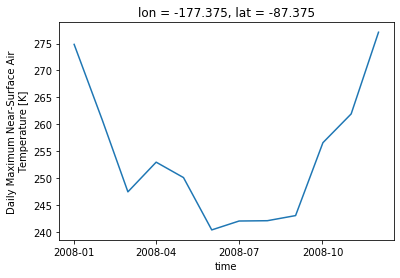

In [33]:
simple = ds.tasmax.isel(lat=10, lon=10)
simple.plot()

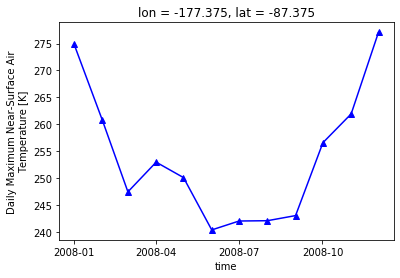

In [34]:
simple.plot.line('b-^')

## Simple plot with time slice

In [2]:
time_series = ds.tasmax.sel(time=slice('2008-01-01T12:00:00','2008-12-01T12:00:00'), lon=179.625, lat=89.375)

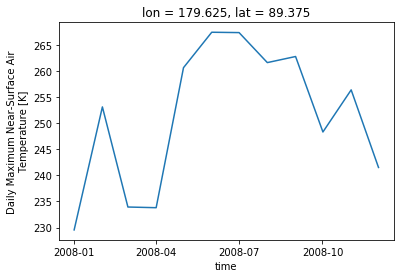

In [3]:
time_series.plot()

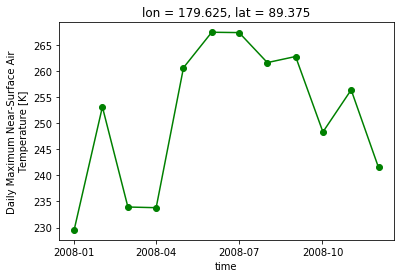

In [4]:
time_series.plot.line(color='green', marker='o')

## Multiple lines showing variation

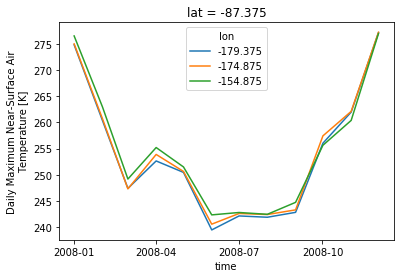

In [47]:
ds.tasmax.isel(lat=10, lon=[2,20,100]).plot.line(x='time')

## Plotting data in 2 dimensions

In [5]:
map_data = ds.tasmax.sel(time='2008-01-01T12:00:00')

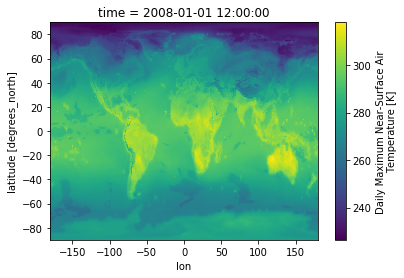

In [6]:
map_data.plot()

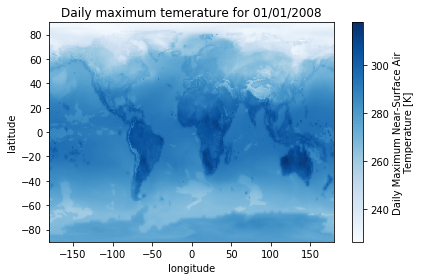

In [9]:
import matplotlib.pyplot as plt
map_data.plot(cmap=plt.cm.Blues)
plt.title('Daily maximum temerature for 01/01/2008')
plt.ylabel('latitude')
plt.xlabel('longitude')
plt.tight_layout()
plt.show()

## Aggregation

[Aggregation methods can be applied to a DataArray over a specified dimension. Suppose we want to calculate the average June/July/August (JJA) temperature for a particular year. Let’s create a DataArray that slices out those months of data for a particular year](https://geohackweek.github.io/nDarrays/05-aggregation/):

In [50]:
JJA = ds.tasmax.sel(time=slice('2008-06-01T12:00:00','2008-09-01T12:00:00'))

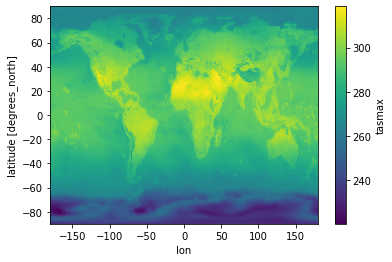

In [51]:
JJA.mean(dim='time').plot()

## Convert temeratures to celsius

In [48]:
JJA = JJA-273.15 # convert to celsius

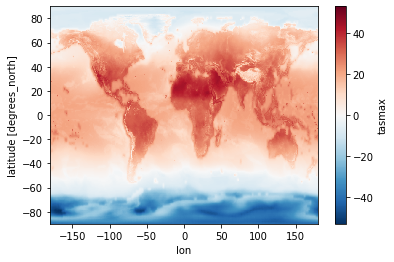

In [49]:
JJA.mean(dim='time').plot()

## Group By

 Explore seasonal variations in temperature:

In [58]:
ds_by_season = ds.tasmax.groupby('time.season').mean('time')

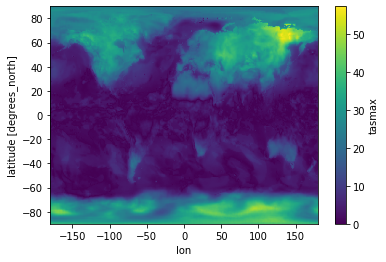

In [59]:
t2m_range = abs(ds_by_season.sel(season='JJA') - ds_by_season.sel(season='DJF'))
t2m_range.plot()